<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import requests
from pprint import pprint 
import json 
from bs4 import BeautifulSoup 

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''select
                count(id)
                from vacancies
'''  

In [5]:
# результат запроса
df_vacancies = pd.read_sql_query(query_3_1, connection)
df_vacancies

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select
                count(id)
                from employers
'''  

In [7]:
# результат запроса
df_employers = pd.read_sql_query(query_3_2, connection)
df_employers

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''select
                count(id)
                from areas
'''  

In [9]:
# результат запроса
df_areas = pd.read_sql_query(query_3_3, connection)
df_areas

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''select
                count(id)
                from industries
'''  

In [11]:
# результат запроса
df_industries = pd.read_sql_query(query_3_4, connection)
df_industries

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,294


***

# Выводы по предварительному анализу данных
Данные представляют собой 5 таблиц, в которых присутствует информация о 49197 вакансиях, 23501 работодателе из 1362 регионов и 294 сферах деятельности.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''select 
                    a.name area,
                    count(*) cnt
                from areas as a
                join vacancies as v on v.area_id = a.id
                group by 1
                order by 2 desc
'''  

In [13]:
# результат запроса
df_vacancies_areas = pd.read_sql_query(query_4_1, connection)
df_vacancies_areas

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''select 
                    count(*) 
                from vacancies
                where (salary_from is not Null) or (salary_to is not Null) 
'''  

In [15]:
# результат запроса
df_salary = pd.read_sql_query(query_4_2, connection)
df_salary

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''select 
                    round(avg(salary_from)) avg_from,
                    round(avg(salary_to)) avg_to 
                from vacancies
'''  

In [17]:
# результат запроса
df_mid_salary = pd.read_sql_query(query_4_3, connection)
df_mid_salary

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''select 
                    schedule,
                    employment,
                    count(*)
                from vacancies
                group by 1, 2
                order by 3 desc
''' 

In [19]:
# результат запроса
df_schedule_employment = pd.read_sql_query(query_4_4, connection)
df_schedule_employment

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5 = f'''select 
                    experience
                from vacancies
                group by 1
                order by count(*)
''' 

In [21]:
# результат запроса
df_experience = pd.read_sql_query(query_4_5, connection)
df_experience

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

C:\Users\kolya\AppData\Local\Temp\ipykernel_2392\1409544959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vacancies_areas_2.loc[len(df_vacancies_areas_2)]=['Другие', sum_others]


Text(0.5, 1.0, 'Распределение вакансий по регионам')

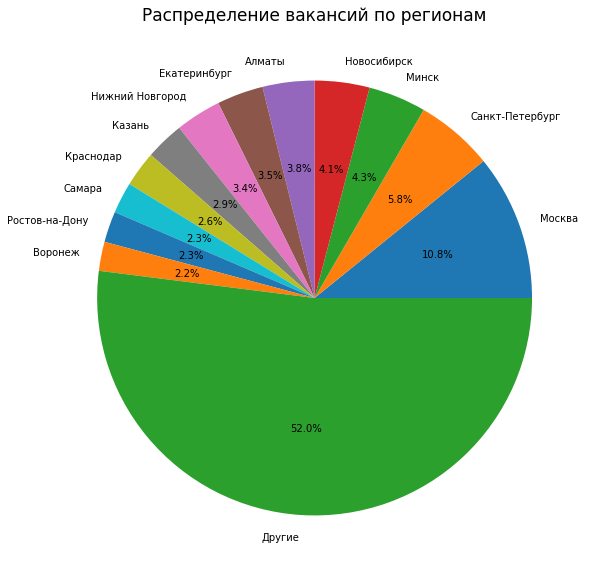

In [22]:
# выводы по детальному анализу вакансий

# Построим круговую диагамму распределения вакансий по регионам
# Создадим в группу "другие", объединяющую регионы, в которых меньше 1000 вакансий 
mask=df_vacancies_areas['cnt'] > 1000
df_vacancies_areas_2=df_vacancies_areas[mask]
sum_others=df_vacancies_areas['cnt'].sum()-df_vacancies_areas_2['cnt'].sum()
df_vacancies_areas_2.loc[len(df_vacancies_areas_2)]=['Другие', sum_others]

plt.figure(figsize=(10,10))
plt.pie(df_vacancies_areas_2['cnt'], labels = df_vacancies_areas_2['area'], autopct='%1.1f%%') 
plt.title('Распределение вакансий по регионам', fontsize=17) 

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0.5, 1.0, 'Требуемый опыт работы')

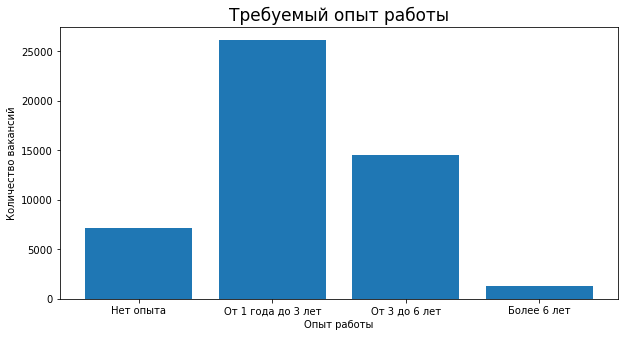

In [23]:
# выводы по детальному анализу вакансий
#Построим столбчатую диаграмму "Требуемый опыт работы"
query_4_experience = f'''select 
                    experience, 
                    count(*)
                from vacancies
                group by 1
                order by 1
''' 
df_experience_count = pd.read_sql_query(query_4_experience, connection)
# 'Вручную' отсортируем по возрастанию опыта работы
# Добавим к существующему df столбец с соответствующими номерами опыта
df_experience_count['num']=[4, 1, 2, 3] # соответствует сортировке опыта по алфавиту
df_experience_count=df_experience_count.sort_values (by = ['num'])
#display(df_experience_count)

plt.figure(figsize=(10,5))
plt.bar(df_experience_count['experience'], df_experience_count['count'])
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.title('Требуемый опыт работы', fontsize=17) 

# Выводы по детальному анализу вакансий
 Наибольшее количество вакансий размещено в крупных городах (как России, так и ближнего зарубежья): Москве, Санкт-Петербурге, Минске, Алматы. 
 Примерно у половины вакансий заполнена хотя бы одна граница зарплатной вилки. Средние значения для нижней и верхней границы зарплатной вилки составляют, соответственно, 71065 и 110537 руб./мес. 
 В данных имеются вакансии с различным сочетанием типа рабочего графика и типа трудоустройства, наиболее популярное сочетание - Полный день/Полная занятость. 
 Наиболее часто требуются соискатели с опытом работы от 1 года до 3 лет. 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query_5_1 = f'''select 
                    e.name 
                from employers e
                join vacancies v on e.id=v.employer_id
                group by 1
                order by count(*) desc
                limit 5
''' 

In [25]:
# результат запроса
df_employers = pd.read_sql_query(query_5_1, connection)
df_employers

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name
0,Яндекс
1,Ростелеком
2,Тинькофф
3,СБЕР
4,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
# Зададим "дополнительные" строки запроса для выполнения задания 5.2
answer_5_2 =f'''having  count(v.id)=0
                order by 3 desc 
'''                

query_5_2 = f'''select 
                a.name area,
                count(v.id) vacancies,
                count(e.id) employers
                from areas a  
                left join vacancies v on a.id=v.area_id
                left join employers e on a.id=e.area
                group by 1
                       
'''  # + answer_5_2 # - ответ на задание 5.2         

In [27]:
# результат запроса
df_areas_employers_vacancies=pd.read_sql_query(query_5_2, connection)
df_areas_employers_vacancies

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,vacancies,employers
0,Анна,1,0
1,Орлов,0,0
2,Пыть-Ях,5,5
3,Бодайбо,10,10
4,Шацк (Рязанская область),0,0
...,...,...,...
1357,Новый Оскол,0,0
1358,Павлово,4,4
1359,Ильинка (Икрянинский район),0,0
1360,Чамзинка,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
query_5_3 = f'''select 
                    e.name employers, 
                    count(distinct v.area_id)
                from employers e
                join vacancies v on v.employer_id=e.id
                group by 1
                order by 2 desc
                               
'''    

In [29]:
# результат запроса
df_employers_areas=pd.read_sql_query(query_5_3, connection)
df_employers_areas

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employers,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса
query_5_4 = f'''select 
                    count(*)             
                from employers e
                left join employers_industries i on i.employer_id=e.id
                where i.industry_id is Null                                           
''' 

In [31]:
# результат запроса
df_employers_no_industries=pd.read_sql_query(query_5_4, connection)
df_employers_no_industries

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса
query_5_5 = f'''select 
                    e.name
                from employers e
                join employers_industries i on i.employer_id=e.id
                group by 1
                having count(industry_id)=4
                order by 1
                offset 2
                limit 1                          
'''        

In [33]:
# результат запроса
df_employers_industries_4=pd.read_sql_query(query_5_5, connection)
df_employers_industries_4

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса
query_5_6 = f'''select 
                    count(*) 
                from employers_industries e
                join industries i on i.id=e.industry_id
                where i.name='Разработка программного обеспечения'                         
'''    

In [35]:
# результат запроса
df_soft=pd.read_sql_query(query_5_6, connection)
df_soft

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим заданием посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
# код для получения списка городов-милионников

# Определяем значение URL страницы для запроса
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' 
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
links = page.find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
link_text_list=[] # создаем список с "текстами ссылок"
for link in links:
    link_text_list.append(link.text)   
# находим номера ссылок, находящихся непосредственно перед и после названий городов ([6] и [7])
index_6=link_text_list.index('[6]')
index_7=link_text_list.index('[7]')
millionaires='(' # формируем строку с перечислением городов
for i in range(index_6+1, index_7): 
    millionaires=millionaires+"'"+link_text_list[i]+"',"       
millionaires=millionaires[0:len(millionaires)-1]+')'  
# millionaires 

In [37]:
# текст запроса
query_5_7 = f'''select 
                    a.name,
                    count(v.id) 
                from areas a
                join vacancies v on v.area_id=a.id
                join employers e on e.id=v.employer_id
                where a.name in {millionaires} and e.name='Яндекс' 
                group by 1
                
                UNION ALL
                
                select 
                   'Total',
                    count(v.id) 
                from areas a
                join vacancies v on v.area_id=a.id
                join employers e on e.id=v.employer_id
                where a.name in {millionaires} and e.name='Яндекс' 
                group by 1
                order by 2
 '''               

In [38]:
# результат запроса
df_soft=pd.read_sql_query(query_5_7, connection)
df_soft

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\kolya\AppData\Local\Temp\ipykernel_2392\2635524444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employers_industries_2.loc[len(df_employers_industries_2)]=['Другие', sum_others]


Text(0.5, 1.0, 'Сферы деятельности работодателей')

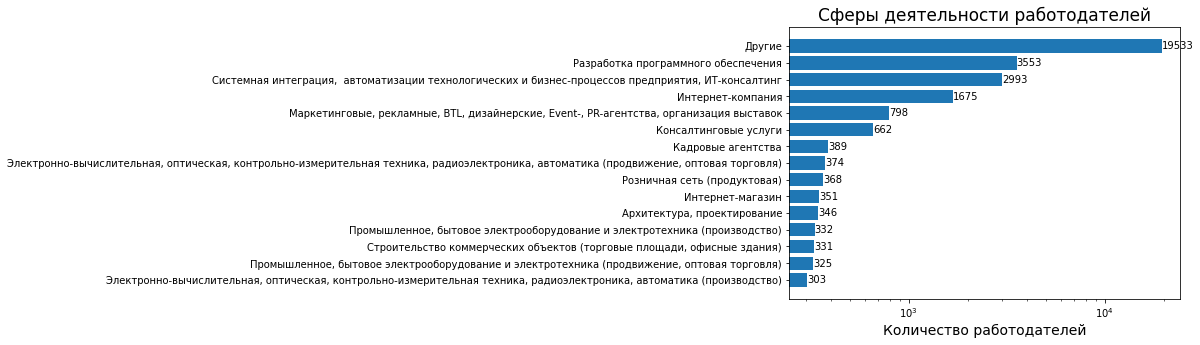

In [39]:
# выводы по анализу работодателей
# Посмотрим, какие сферы деятельности работодатели указывают чаще всего
# текст запроса
query_5_industries = f'''select 
                    i.name,
                    count(*)
                from industries i
                join employers_industries e on i.id = e.industry_id
                group by 1
                order by 2 desc               
''' 

df_employers_industries = pd.read_sql_query(query_5_industries, connection)

# Построим столбчатую диагамму, демонстрирующую количество работодателей в наиболее распространенных сферах деятельности
# Создадим в группу "другие", объединяющую сферы деятельности, в которых меньше 300 работодателей  
mask=df_employers_industries['count'] > 300
df_employers_industries_2=df_employers_industries[mask]
sum_others=df_employers_industries['count'].sum()-df_employers_industries_2['count'].sum()
df_employers_industries_2.loc[len(df_employers_industries_2)]=['Другие', sum_others]
df_employers_industries_2 = df_employers_industries_2.sort_values(by = ['count'])
df_employers_industries_2=df_employers_industries_2.reset_index(drop=True)
# Для небольшого повышения наглядности диаграммы сократим самое длинное название сферы деятельности (индекс - для ограничения 300!!!)
df_employers_industries_2.iloc[11,0]='Интернет-компания'

# Построим столбчатую диаграмму с логарифмической шкалой
fig, ax = plt.subplots(figsize=(7,5))
bars = plt.barh(df_employers_industries_2['name'], df_employers_industries_2['count'], log=True)
ax.bar_label(bars)
plt.xlabel('Количество работодателей', fontsize = 14)
plt.title('Сферы деятельности работодателей', fontsize=17) 

In [40]:
# выводы по анализу работодателей
# Посмотрим, в каких регионах зарегистрированы работодатели
query_employers_regions=f'''select 
                    a.name,
                    count(*)
                from areas a    
                join employers e on a.id=e.area
                
                group by 1
                order by 2 desc               
''' 
df_employers_regions = pd.read_sql_query(query_employers_regions, connection)
df_employers_regions

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,Москва,5864
1,Санкт-Петербург,2217
2,Минск,1115
3,Алматы,721
4,Екатеринбург,609
...,...,...
649,Узловая,1
650,Междуреченск,1
651,Березовский (Свердловская область),1
652,Лебедянь,1


# Выводы по анализу работодателей
 Представлены работодатели, зарегистрированные в 653 регионах, больше всего работодателей зарегистрированов Москве. Наибольшее количество работодателей указали в качестве сфер своей деятельности разработку программного обеспечения, а также  системную интеграцию, автоматизацию технологических и бизнес-процессов предприятия, IT-консалтинг. Некоторые работодатели указали несколько сфер деятельности, а больше трети работодателей не указали сферу деятельности совсем.  Работодатели, разместившие наибольшее количество вакансий, отноятся к IT, банковской и нефтяной сферам. На первом месте как по количеству вакансий, так и по числу регионов, находится "Яндекс".   

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [41]:
# текст запроса
query_6_1 = f'''select 
                    count(*) 
                from vacancies
                where (lower(name) like '%data%') or  (lower(name) like '%данн%')                      
'''    

In [42]:
# результат запроса
df_data_vacancies=pd.read_sql_query(query_6_1, connection)
df_data_vacancies

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [43]:
# текст запроса
# Создаем строку ds_vacancies - универсальные условия для вакансий по data science
ds_vacancies = f'''((lower(name) like '%data scientist%') or (lower(name) like '%data science%')
or (lower(name) like '%исследователь данных%') or (lower(name) like '%machine learning%')
or (lower(name) like '%машинн%обучен%')
or ((name like '%ML%') and (name not like '%HTML%')))
'''

query_6_2 = f'''select 
                    count(*) 
                from vacancies
                where {ds_vacancies} and ((lower(name) like '%junior%') or (experience = 'Нет опыта') or (employment = 'Стажировка'))                                 
''' 

In [44]:
# результат запроса
df_data_sciense_vacancies=pd.read_sql_query(query_6_2, connection)
df_data_sciense_vacancies

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [45]:
# текст запроса
query_6_3 = f'''select 
                    count(*) 
                from vacancies
                where {ds_vacancies} and ((key_skills like '%SQL%') or (key_skills like '%postgres%'))
'''                    

In [46]:
# результат запроса
df_sql_postgres=pd.read_sql_query(query_6_3, connection)
df_sql_postgres

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [47]:
# текст запроса
query_6_4 = f'''select 
                    count(*) 
                from vacancies
                where {ds_vacancies} and (key_skills like '%Python%')
'''        

In [48]:
# результат запроса
df_python=pd.read_sql_query(query_6_4, connection)
df_python

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [49]:
# текст запроса
# Заменяем '\t', разделяющий навыки и не учитываемый в подсчете символов, на ' _'
# Каждая такая замена увеличивает длину строки на 1 (не на 2!) 
# Учитываем, что ключевых навыков на 1 больше, чем разделителей
query_6_5 = f'''select 
                    round(avg(length(replace(key_skills, '\t', ' _'))-length(key_skills)+1), 2)
                from vacancies
                where {ds_vacancies}                   
'''        

In [50]:
# результат запроса
df_key_skills = pd.read_sql_query(query_6_5, connection)
df_key_skills

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [51]:
# текст запроса
query_6_6 = f'''select 
                 experience,
                 avg((coalesce(salary_from, salary_to)+coalesce(salary_to, salary_from))/2)  mean_salary
                from vacancies
                where {ds_vacancies} and (salary_from is not null or salary_to is not null)
                group by 1
'''                  

In [52]:
# результат запроса
df_salary = pd.read_sql_query(query_6_6, connection)
df_salary #.head(50)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,mean_salary
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


***

In [53]:
# выводы по предметному анализу
# Посмотрим, сколько всего вакансий для дата-сайентистов
query_ds = f'''select 
                    count(*) 
                from vacancies
                where {ds_vacancies}                                 
''' 
df_ds = pd.read_sql_query(query_ds, connection)
df_ds

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,480


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0.5, 1.0, 'Требуемые типы рабочего графика для дата-сайентистов')

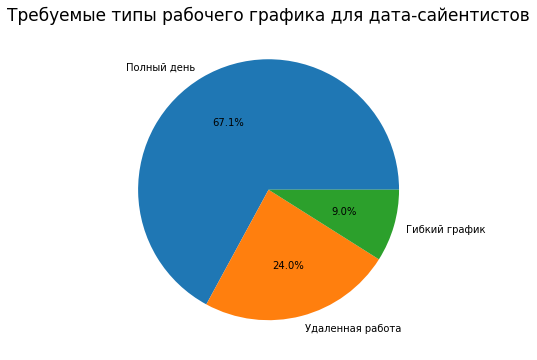

In [54]:
# выводы по предметному анализу
# Посмотрим, какой тип рабочего графика является наиболее востребованным для DS
# текст запроса
query_schedule = f'''select 
                 schedule,
                 count(*)
                from vacancies
                where {ds_vacancies} 
                group by 1
                order by 2 desc
'''    
df_schedule = pd.read_sql_query(query_schedule, connection)
#display(df_schedule)

# Построим круговую диагамму 
plt.figure(figsize=(6,6))
plt.pie(df_schedule['count'], labels = df_schedule['schedule'], autopct='%1.1f%%') 
plt.title('Требуемые типы рабочего графика для дата-сайентистов', fontsize=17) 


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0.5, 1.0, 'Требуемый опыт работы для дата-сайентистов')

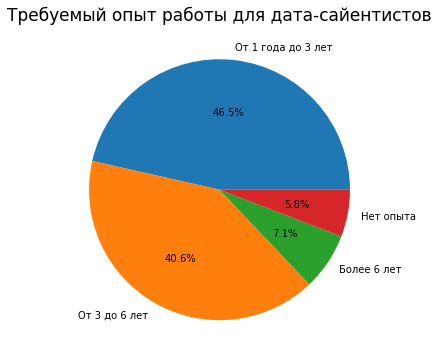

In [55]:
# выводы по предметному анализу
# Посмотрим, какой опыт работы дата-сайентистов является наиболее востребованным
# текст запроса
query_experience_ds = f'''select 
                 experience,
                 count(*)
                from vacancies
                where {ds_vacancies} 
                group by 1
                order by 2 desc
'''    
df_experience_ds = pd.read_sql_query(query_experience_ds, connection)
#display(df_experience_ds)

# Построим круговую диагамму 
plt.figure(figsize=(6,6))
plt.pie(df_experience_ds['count'], labels = df_experience_ds['experience'], autopct='%1.1f%%') 
plt.title('Требуемый опыт работы для дата-сайентистов', fontsize=17) 


In [56]:
# выводы по предметному анализу
# Посмотрим, для скольки DS вакансий указана хотя бы одна граница заработной платы
query_salary=f'''select 
                    count(*)
                from vacancies
                where (salary_from is not null or salary_to is not null) and {ds_vacancies}
'''   
df_salary = pd.read_sql_query(query_salary, connection)
df_salary   

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,62


In [57]:
# выводы по предметному анализу
# Посмотрим, насколько тип рабочего графика влияет на среднюю заработную плату
# текст запроса
query_salary_schedule = f'''select 
                 schedule,
                 count(*),
                 avg((coalesce(salary_from, salary_to)+coalesce(salary_to, salary_from))/2)  mean_salary
                from vacancies
                where {ds_vacancies} and (salary_from is not null or salary_to is not null)
                group by 1
                order by 3 desc
'''    
df_salary_schedule = pd.read_sql_query(query_salary_schedule, connection)
df_salary_schedule

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,schedule,count,mean_salary
0,Удаленная работа,17,190042.823529
1,Полный день,41,175725.878049
2,Гибкий график,4,140500.000000


In [58]:
# выводы по предметному анализу
# В этой ячейке рассматриваем только вакансии, для которых указана заработная плата 
# Посмотрим, насколько знание python и sql влияют на среднюю заработную плату
# текст запроса
query_salary_sql = f'''select 
                    '-' key_skills,
                    count(*),
                    avg((coalesce(salary_from, salary_to)+coalesce(salary_to, salary_from))/2)  mean_salary 
                from vacancies
                where {ds_vacancies} and not ((key_skills like '%SQL%') or (key_skills like '%postgres%')) 
                and  not (key_skills like '%Python%') 
                and (salary_from is not null or salary_to is not null)
                
                UNION ALL 
                
                select 
                    'Python, SQL and Postgres' key_skills,
                    count(*),
                    avg((coalesce(salary_from, salary_to)+coalesce(salary_to, salary_from))/2)  mean_salary 
                from vacancies
                where {ds_vacancies} and ((key_skills like '%SQL%') or (key_skills like '%postgres%')) 
                and  (key_skills like '%Python%') 
                and (salary_from is not null or salary_to is not null) 
                
'''     
df_salary_sql_Python = pd.read_sql_query(query_salary_sql, connection)
display(df_salary_sql_Python)

# Получили, что есть всего 7 DS вакансий, где не требуются Python и SQL, при этом для них указана высокая заработная плата
# Посмотрим на эти вакансии
query_not_sql = f'''select *
                from vacancies
                where {ds_vacancies} and not ((key_skills like '%SQL%') or (key_skills like '%postgres%')) 
                and  not (key_skills like '%Python%') 
                and (salary_from is not null or salary_to is not null)
'''     
df_not_sql_Python = pd.read_sql_query(query_not_sql, connection)
display(df_not_sql_Python)

# Видим, что везде требуется опыт работы от 3 лет
# Результаты исследований, проведенных в данной ячейке, пока не представляется целесообразным включать в выводы. 

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,key_skills,count,mean_salary
0,"Python, SQL and Postgres",25,154980.000000
1,-,7,278768.857143


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55313995,C++ Machine Learning Engineer (Computer Vision),Computer Vision\tC/C++\tMachine learning,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,233794,5046,5970808
1,55313994,C++ Machine Learning Engineer (Computer Vision),Computer Vision\tC/C++\tMachine learning,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,233794,146,5970808
2,66108173,ML Engineer \ Data scientist,Нейронные сети\tУдаленная работа\tMachine Lear...,Полный день,От 3 до 6 лет,Полная занятость,200000.0,700000,1,4700635
3,55313993,C++ Machine Learning Engineer (Computer Vision),Computer Vision\tC/C++\tMachine learning,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,233794,94,5970808
4,55026097,Инженер по машинному обучению,MS PowerPoint\tPower BI\tАналитическое мышлени...,Полный день,От 3 до 6 лет,Полная занятость,NaN,200000,17,791791
5,54933144,Senior Data Scientist,Знание стека DS\tЗнание теории машинного обуче...,Полный день,От 3 до 6 лет,Полная занятость,200000.0,400000,2,2851802
6,54933141,Senior Data Scientist,Знание стека DS\tЗнание теории машинного обуче...,Полный день,От 3 до 6 лет,Полная занятость,200000.0,400000,1,2851802


In [59]:
# выводы по предметному анализу
# Посмотрим, в каких регионах требуются дата-сайентисты на полный день и с гибким графиком 
# Перепишем формулировку {ds_vacancies}, так как в areas имеется столбец "name" 
ds_vacancies_2 = f'''((lower(v.name) like '%data scientist%') or (lower(v.name) like '%data science%')
or (lower(v.name) like '%исследователь данных%') or (lower(v.name) like '%machine learning%')
or (lower(v.name) like '%машинн%обучен%')
or ((v.name like '%ML%') and (v.name not like '%HTML%')))
'''
query_location=f'''select
                    a.name area,
                    count(*)
                from areas a
                join vacancies v on v.area_id=a.id
                where {ds_vacancies_2} and not (v.schedule = 'Удаленная работа') 
                group by 1
                order by 2 desc
                limit 10
'''   
df_location = pd.read_sql_query(query_location, connection)
df_location     

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,count
0,Москва,172
1,Санкт-Петербург,53
2,Новосибирск,18
3,Нижний Новгород,17
4,Алматы,12
5,Казань,11
6,Минск,8
7,Томск,7
8,Ростов-на-Дону,6
9,Нур-Султан,5


# Выводы по предметному анализу
К данным имеет отношение 1771 вакансия, из них для дата-сайентистов - 480.\
 Вакансий для начинающих дата-сайентистов чуть больше 10%. \
 Знание Python требуется в 351 вакансии, SQL или postgres - в 201. В среднем для трудоустройства дата-саентистом необходимо владеть 6-7 навыками.\
Наиболее востребованный тип рабочего графика - "Полный день".\
 Опыт работы оказывает прямое влияние на ожидаемую заработную плату. Для сотрудников без опыта средняя заработная плата составляет порядка 75000 руб./мес., с опытом от 3 до 6 лет - 244000 руб./мес. При типе рабочего графика "Удаленная работа" средняя заработная плата несколько выше, чем при типах "Полный день" и "Гибкий график" (190000, 176000 и 140500 руб./мес. соответственно).\
Хотя бы одна граница заработной платы указана для небольшого числа вакансий (13% от всех вакансий дата-сайентистов), поэтому делать общие выводы о заработной плате может оказаться некорректным.

# Общий вывод по проекту

In [60]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

# Так как основная задача - рекомендация вакансий для дата-сайентистов, 
# основные исследования были проведены при формулировке выводов по предметному анализу

Среди всех имеющихся в базе вакансий всего порядка 1% - для дата-сайентистов. 
Для соискателей необходимо учитывать, что больше всего вакансий, не связанных с удаленной работой, предлагается в Москве и Санкт-Петербурге. В более чем 70% вакансий требуется знание Python. Во многих случаях размер заработной платы заранее не известен.   
\
Представляется целесообразным посмотреть, в каких именно отраслях, особенно незначительно связанных с цифровыми технологиями, требуются дата-саентисты; исследовать, какие ключевые навыки помимо Python (в частности, знание различных языков программирования) являются наиболее востребованными; выяснить, почему в вакансиях с высокой заработной платой и требованиями большого опыта работы не требуетcя знание Python и SQL (вероятно, владение этими навыками является само собой разумеющимся).
\ Существенным недостатком имеющихся данных можно считать небольшое количество вакансий для дата-сайентистов, в которых указана заработная плата.  